In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
births_df = pd.read_csv("births.csv")

Descriptive Statistics:
               year         month           day         births        Decade
count  15547.000000  15547.000000  15067.000000   15547.000000  15547.000000
mean    1979.037435      6.515919     17.769894    9762.293561   1974.544285
std        6.728340      3.449632     15.284034   28552.465810      6.789583
min     1969.000000      1.000000      1.000000       1.000000   1960.000000
25%     1974.000000      4.000000      8.000000    4358.000000   1970.000000
50%     1979.000000      7.000000     16.000000    4814.000000   1970.000000
75%     1984.000000     10.000000     24.000000    5289.500000   1980.000000
max     2008.000000     12.000000     99.000000  199622.000000   2000.000000

Missing Values Check:
year        0
month       0
day       480
gender      0
births      0
Decade      0
dtype: int64


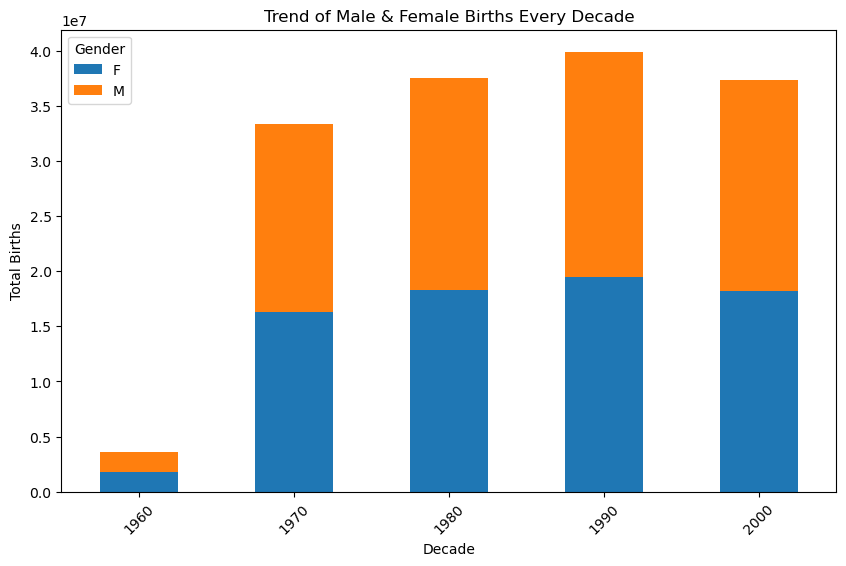

In [2]:
# Q.1: Add a new column “Decade” by calculating.
births_df['Decade'] = births_df['year'] - (births_df['year'] % 10)

# Q.2: Show the descriptive statistics of the data.
print("Descriptive Statistics:")
print(births_df.describe())

# Q.3: Check if your data contains any missing values
print("\nMissing Values Check:")
print(births_df.isnull().sum())

# Q.4: What is the trend of male & female births every decade?
trend_by_decade = births_df.groupby(['Decade', 'gender'])['births'].sum().unstack()
trend_by_decade.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Trend of Male & Female Births Every Decade')
plt.xlabel('Decade')
plt.ylabel('Total Births')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

In [3]:
# Q.5: Remove outliers using the technique of 5 standard deviations from the mean
mean_births = births_df['births'].mean()
std_births = births_df['births'].std()
births_df = births_df[(births_df['births'] >= mean_births - 5 * std_births) & (births_df['births'] <= mean_births + 5 * std_births)]
births_df

,year,month,day,gender,births,Decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15309,1999,2,NaN,F,145172,1990
15357,2001,2,NaN,F,148640,2000
15381,2002,2,NaN,F,148745,2000
15405,2003,2,NaN,F,150278,2000


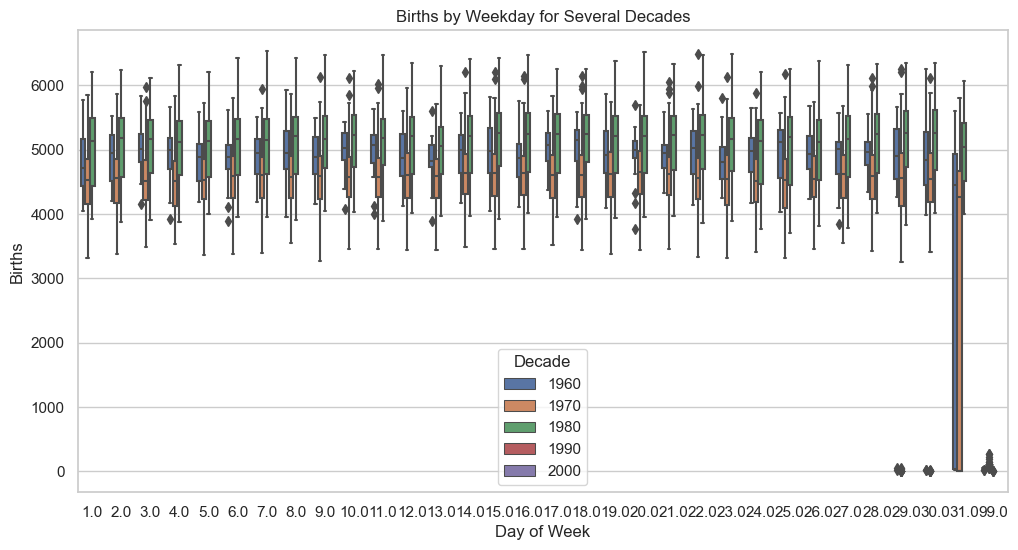

In [4]:
# Q.6: Plot births by weekday for several decades
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='day', y='births', hue='Decade', data=births_df)
plt.title('Births by Weekday for Several Decades')
plt.xlabel('Day of Week')
plt.ylabel('Births')
plt.legend(title='Decade')
plt.show()


In [5]:

# Q.7: Group the data by month and day separately
births_by_month = births_df.groupby('month')['births'].mean()
births_by_day = births_df.groupby('day')['births'].mean()
births_by_day


day
1.0     4764.279167
2.0     4798.266667
3.0     4810.597917
4.0     4763.725000
5.0     4785.314583
6.0     4808.485417
7.0     4821.002083
8.0     4838.283333
9.0     4823.031250
10.0    4848.327083
11.0    4832.418750
12.0    4839.491667
13.0    4772.700000
14.0    4865.731250
15.0    4861.304167
16.0    4859.283333
17.0    4865.537500
18.0    4864.477083
19.0    4856.631250
20.0    4870.064583
21.0    4853.256250
22.0    4828.564583
23.0    4802.445833
24.0    4771.875000
25.0    4758.281250
26.0    4792.100000
27.0    4821.016667
28.0    4851.312500
29.0    4718.271552
30.0    4759.528889
31.0    3697.316804
99.0      18.294286
Name: births, dtype: float64

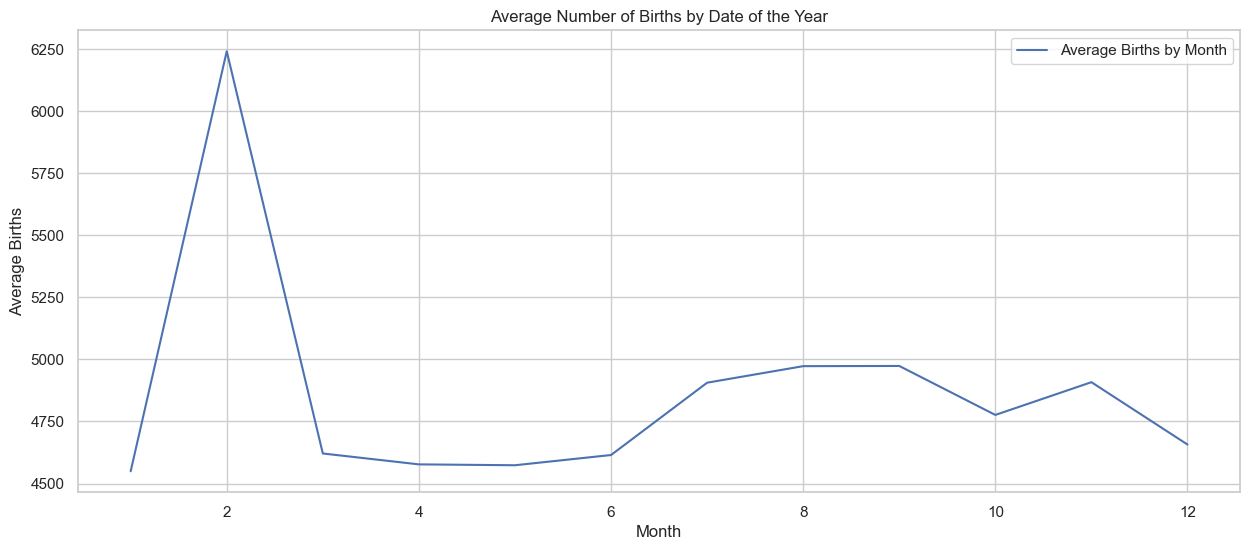

In [13]:
# Q.8: Plotting the average number of births by date of the year
plt.figure(figsize=(15, 6))
plt.plot(births_by_month.index, births_by_month.values, label='Average Births by Month')
plt.title('Average Number of Births by Date of the Year')
plt.xlabel('Month')
plt.ylabel('Average Births')
plt.legend()
plt.show()
